OpenCV keypoints: 747
Custom keypoints: 715
Angles sample: [26.686973571777344, 32.47315979003906, 31.349252700805664, 38.677337646484375, 36.10297775268555, 58.6738166809082, 64.39860534667969, 69.53646850585938, 65.10470581054688, 65.45706939697266] Sizes sample: [2.6152963638305664, 2.5448148250579834, 2.6128509044647217, 2.563372850418091, 2.569905996322632, 2.59360408782959, 2.6101529598236084, 2.6089978218078613, 2.6053168773651123, 2.5906221866607666]


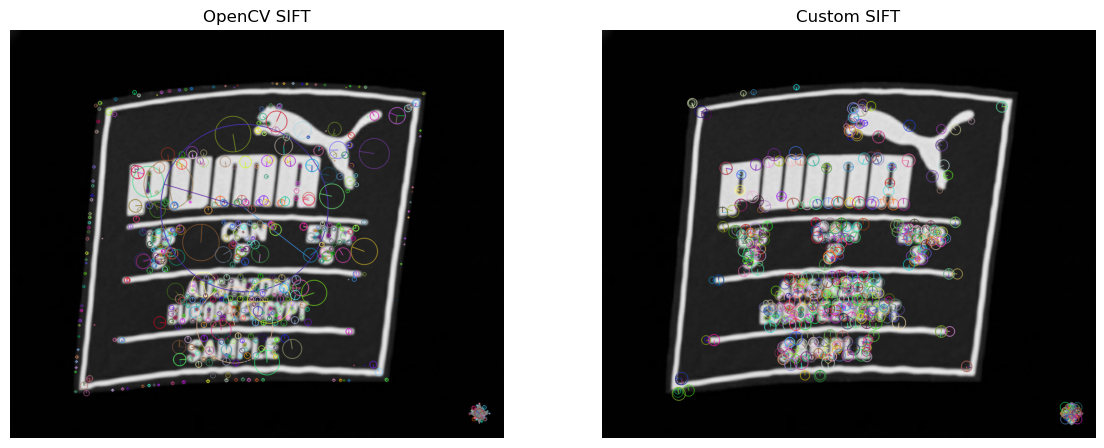

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
import importlib

sys.path.append("../src")

import sift
importlib.reload(sift)

img = cv2.imread("../Logos/Puma/logo4.png", cv2.IMREAD_GRAYSCALE)
assert img is not None, "Image not found"

cv_sift = cv2.SIFT_create(
    nOctaveLayers=7,
    contrastThreshold=0.01,
    sigma=1.414
)

kp_cv, desc_cv = cv_sift.detectAndCompute(img, None)
print(f"OpenCV keypoints: {len(kp_cv)}")

sift.init(
    layer_count=7,
    contrast_threshold=0.01,
    sigma=0.84
)

kp_c, desc_c = sift.calc_sift(img)

print(f"Custom keypoints: {len(kp_c)}")
print(
    "Angles sample:",
    [kp.angle for kp in kp_c[:10]],
    "Sizes sample:",
    [kp.size for kp in kp_c[:10]],
)

img_cv = cv2.drawKeypoints(
    img,
    kp_cv,
    None,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

img_c = cv2.drawKeypoints(
    img,
    kp_c,
    None,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)


plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.title("OpenCV SIFT")
plt.imshow(img_cv, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Custom SIFT")
plt.imshow(img_c, cmap="gray")
plt.axis("off")

plt.show()